#Q1 split data train the models without feature engineering




in this block
we decided to do standard scaling for the data


after many practices on the training

and now the models performances are much better


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
# Load the dataset
dataset = pd.read_csv('MCSDatasetNEXTCONLab.csv')

# Create training dataset (days 0, 1, 2)
train_dataset = dataset[dataset['Day'].isin([0, 1, 2])].copy()

# Create test dataset (day 3)
test_dataset = dataset[dataset['Day'] == 3].copy()

# Remove irrelevant columns (ID and day)
train_dataset.drop(['ID', 'Day'], axis=1, inplace=True)
test_dataset.drop(['ID', 'Day'], axis=1, inplace=True)

# Separate features and target variable
X_train = train_dataset.drop('Ligitimacy', axis=1)
y_train = train_dataset['Ligitimacy']
X_test = test_dataset.drop('Ligitimacy', axis=1)
y_test = test_dataset['Ligitimacy']
print(dataset)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


         ID   Latitude  Longitude  Day  Hour  Minute  Duration  RemainingTime  \
0         1  45.442142 -75.303369    1     4      13        40             40   
1         1  45.442154 -75.304366    1     4      23        40             30   
2         1  45.442104 -75.303963    1     4      33        40             20   
3         1  45.441868 -75.303577    1     4      43        40             10   
4         2  45.447727 -75.147722    2    15      49        30             30   
...     ...        ...        ...  ...   ...     ...       ...            ...   
14479  3999  45.445303 -75.165596    2     1      18        20             20   
14480  3999  45.445574 -75.165168    2     1      28        20             10   
14481  4000  45.436682 -75.152416    0    12      21        30             30   
14482  4000  45.436978 -75.153278    0    12      31        30             20   
14483  4000  45.436983 -75.153240    0    12      41        30             10   

       Resources  Coverage 

Naive Bayes Classifier: Train and predict using GaussianNB from sklearn.
Evaluation Metrics for Naive Bayes: Calculate confusion matrix and F1 score.
K-Nearest Neighbor Classifier: Train and predict using KNeighborsClassifier from sklearn.
Evaluation Metrics for KNN: Calculate confusion matrix and F1 score.

---



In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
nb_predictions = nb_classifier.predict(X_test)

# Calculate the confusion matrix and F1 score for NB classifier
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
nb_f1_score = f1_score(y_test, nb_predictions, average='weighted')

# Initialize and train the K-Nearest Neighbor classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
knn_predictions = knn_classifier.predict(X_test)

# Calculate the confusion matrix and F1 score for KNN classifier
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')


In [5]:
print("F1 Score - Naive Bayes Classifier: ", nb_f1_score)
print("F1 Score - K-Nearest Neighbor Classifier: ", knn_f1_score)

F1 Score - Naive Bayes Classifier:  0.8427708087025669
F1 Score - K-Nearest Neighbor Classifier:  0.8627163504968383


In [6]:
import numpy as np
import seaborn as sns

def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Confusion Matrix - Naive Bayes Classifier:


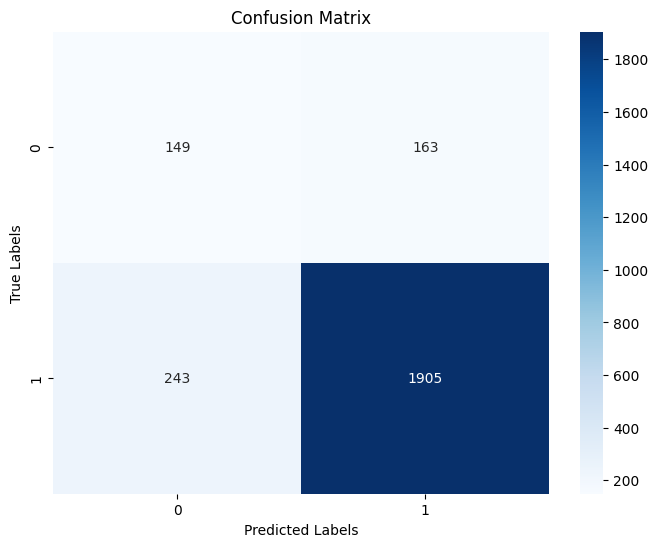


Confusion Matrix - K-Nearest Neighbor Classifier:


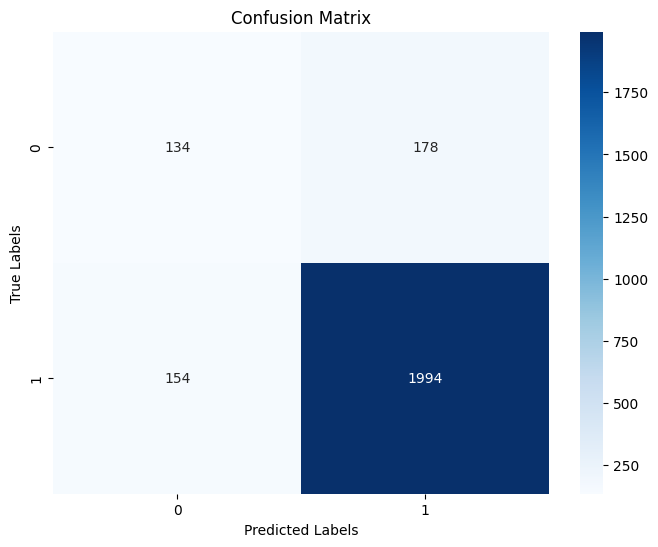

In [7]:
# Plot confusion matrix for Naive Bayes Classifier
print("Confusion Matrix - Naive Bayes Classifier:")
plot_confusion_matrix(nb_confusion_matrix)

print("\nConfusion Matrix - K-Nearest Neighbor Classifier:")
# Plot confusion matrix for K-Nearest Neighbor Classifier
plot_confusion_matrix(knn_confusion_matrix)

#knn is performing better in predicting 1
#NB is performing better in predicting 0

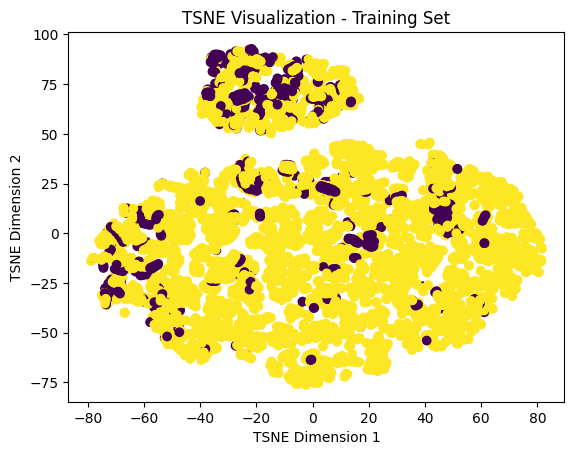

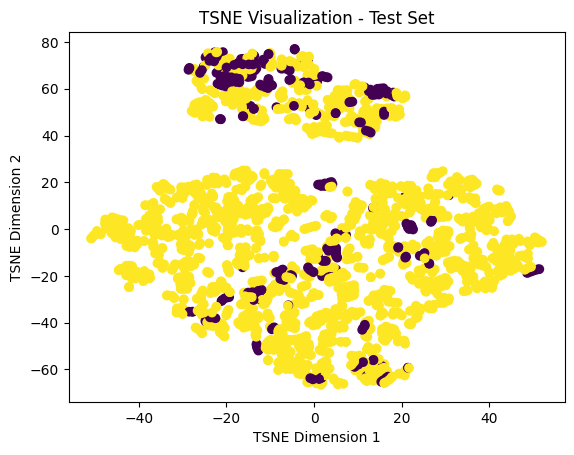

In [8]:


# Perform TSNE on the training set
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Plot the TSNE visualization for the training set
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('TSNE Visualization - Training Set')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()

# Perform TSNE on the test set
X_test_tsne = tsne.fit_transform(X_test)

# Plot the TSNE visualization for the test set
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('TSNE Visualization - Test Set')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()


If most data samples in a t-SNE 2D graph are close together, it indicates similarity or clustering among those samples.

#Q2
now we will start the dimensionality reductoin
first we will write the auto encoder function


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
def create_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoder_layer1 = Dense(64, activation='relu')(input_layer)
    encoder_layer2 = Dense(32, activation='relu')(encoder_layer1)
    encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)
    decoder_layer1 = Dense(32, activation='relu')(encoder_layer3)
    decoder_layer2 = Dense(64, activation='relu')(decoder_layer1)
    decoder_layer3 = Dense(input_dim, activation='linear')(decoder_layer2)
    autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder


# we will use PCA and AUto encoder

we will compare

pca==> knn
pca==> NB

AE ==> knn
AE ==> NB

In [10]:

# Define the dimensions to be tested
dimensions = np.arange(1, X_train.shape[1]+1)

# Initialize empty lists to store F1 scores
nb_pca_f1_scores = []
knn_pca_f1_scores = []
nb_ae_f1_scores = []
knn_ae_f1_scores = []

# Perform PCA and calculate F1 scores for each dimension
for n in dimensions:
    # PCA
    pca = PCA(n_components=n, random_state=0)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # NB with PCA
    nb_classifier_pca = GaussianNB()
    nb_classifier_pca.fit(X_train_pca, y_train)
    nb_predictions_pca = nb_classifier_pca.predict(X_test_pca)
    nb_f1_score_pca = f1_score(y_test, nb_predictions_pca, average='weighted')
    nb_pca_f1_scores.append(nb_f1_score_pca)

    # KNN with PCA
    knn_classifier_pca = KNeighborsClassifier()
    knn_classifier_pca.fit(X_train_pca, y_train)
    knn_predictions_pca = knn_classifier_pca.predict(X_test_pca)
    knn_f1_score_pca = f1_score(y_test, knn_predictions_pca, average='weighted')
    knn_pca_f1_scores.append(knn_f1_score_pca)

    # AE
    autoencoder = create_autoencoder(X_train.shape[1], n)
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, verbose=0)
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=3).output)
    X_train_ae = encoder.predict(X_train)
    X_test_ae = encoder.predict(X_test)

    # NB with AE
    nb_classifier_ae = GaussianNB()
    nb_classifier_ae.fit(X_train_ae, y_train)
    nb_predictions_ae = nb_classifier_ae.predict(X_test_ae)
    nb_f1_score_ae = f1_score(y_test, nb_predictions_ae, average='weighted')
    nb_ae_f1_scores.append(nb_f1_score_ae)

    # KNN with AE
    knn_classifier_ae = KNeighborsClassifier()
    knn_classifier_ae.fit(X_train_ae, y_train)
    knn_predictions_ae = knn_classifier_ae.predict(X_test_ae)
    knn_f1_score_ae = f1_score(y_test, knn_predictions_ae, average='weighted')
    knn_ae_f1_scores.append(knn_f1_score_ae)


77/77 [==============================] - 0s 2ms/step


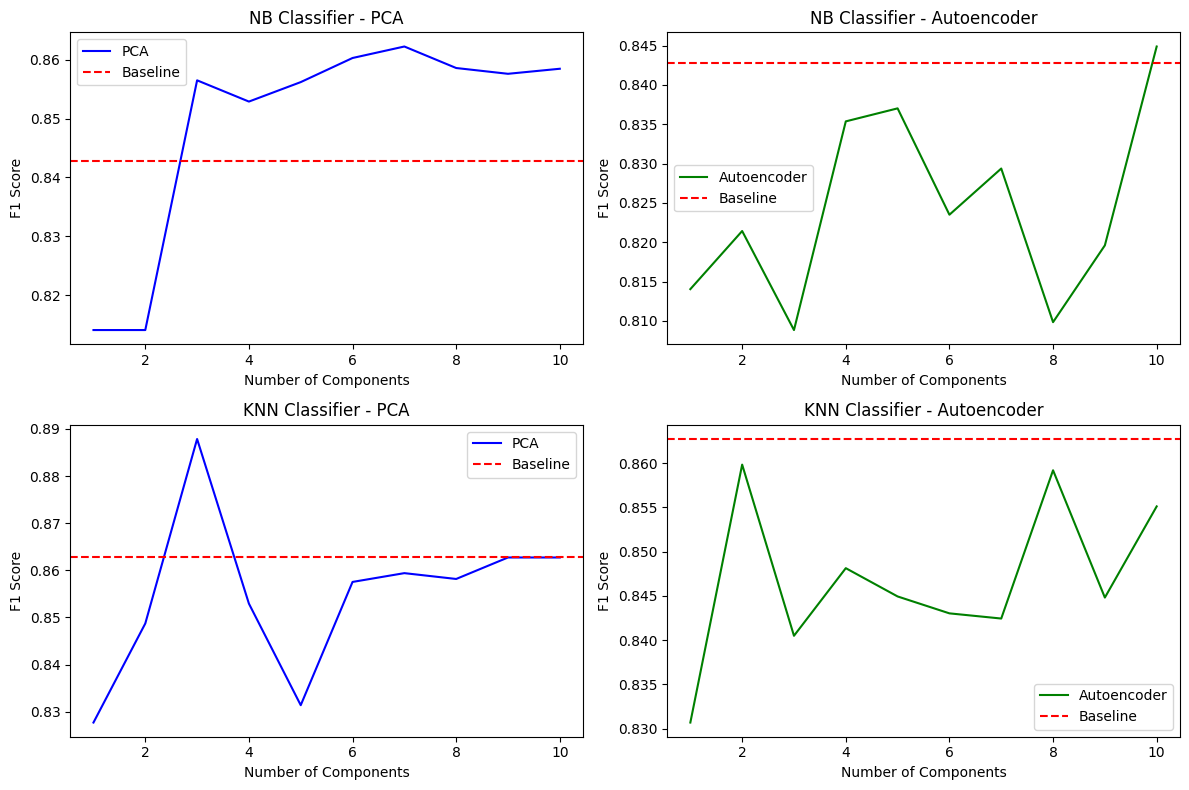

In [11]:


# Plotting the results
plt.figure(figsize=(12, 8))
# NB Classifier - PCA
plt.subplot(2, 2, 1)
plt.plot(dimensions, nb_pca_f1_scores, 'b-', label='PCA')
plt.axhline(y=nb_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('NB Classifier - PCA')
plt.legend()

# NB Classifier - Autoencoder
plt.subplot(2, 2, 2)
plt.plot(dimensions, nb_ae_f1_scores, 'g-', label='Autoencoder')
plt.axhline(y=nb_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('NB Classifier - Autoencoder')
plt.legend()

# KNN Classifier - PCA
plt.subplot(2, 2, 3)
plt.plot(dimensions, knn_pca_f1_scores, 'b-', label='PCA')
plt.axhline(y=knn_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('KNN Classifier - PCA')
plt.legend()

# KNN Classifier - Autoencoder
plt.subplot(2, 2, 4)
plt.plot(dimensions, knn_ae_f1_scores, 'g-', label='Autoencoder')
plt.axhline(y=knn_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('KNN Classifier - Autoencoder')
plt.legend()

plt.tight_layout()
plt.show()


#now we want to show the best improved performance

In [12]:
# Determine the best dimensionality reduction technique based on F1 scores for nb gaussian
best_f1_score_pca_nb = max(nb_pca_f1_scores)
best_f1_score_ae_nb = max(nb_ae_f1_scores)

if best_f1_score_pca_nb >= best_f1_score_ae_nb:
    best_technique = 'PCA'
    best_dimension_nb = dimensions[np.argmax(nb_pca_f1_scores)]
    best_f1_score_nb = best_f1_score_pca_nb
else:
    best_technique = 'AE'
    best_dimension_nb = dimensions[np.argmax(nb_ae_f1_scores)]
    best_f1_score_nb = best_f1_score_ae_nb

print("Best Dimensionality Reduction Technique for NB gaussian: ", best_technique)
print("Best Dimension: ", best_dimension_nb)
print("Best F1 Score: ", best_f1_score_nb)



Best Dimensionality Reduction Technique for NB gaussian:  PCA
Best Dimension:  7
Best F1 Score:  0.8622340790236424


#NB ==> PCA

above here PCA for the NB but i think the 3 dimension will give more general model

In [13]:
# Determine the best dimensionality reduction technique based on F1 scores for KNN
best_f1_score_pca_knn = max(knn_pca_f1_scores)
best_f1_score_ae_knn = max(knn_ae_f1_scores)

if best_f1_score_pca_knn >= best_f1_score_ae_knn:
    best_technique_knn = 'PCA'
    best_dimension_knn = dimensions[np.argmax(knn_pca_f1_scores)]
    best_f1_score_knn = best_f1_score_pca_knn
else:
    best_technique_knn = 'AE'
    best_dimension_knn = dimensions[np.argmax(knn_ae_f1_scores)]
    best_f1_score_knn = best_f1_score_ae_knn

print("Best Dimensionality Reduction Technique for KNN: ", best_technique_knn)
print("Best Dimension for KNN: ", best_dimension_knn)
print("Best F1 Score for KNN: ", best_f1_score_knn)


Best Dimensionality Reduction Technique for KNN:  PCA
Best Dimension for KNN:  3
Best F1 Score for KNN:  0.8878507637570797


#knn ==> PCA
and only 3 features ==>

not complex

now we will create t-sne plots after the reduction
we hope the data are more able to be in clusters


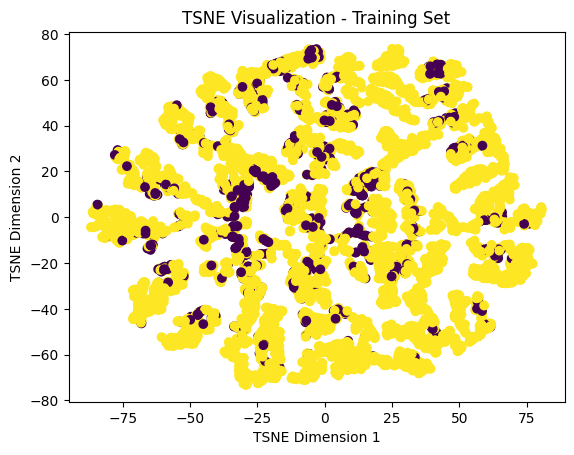

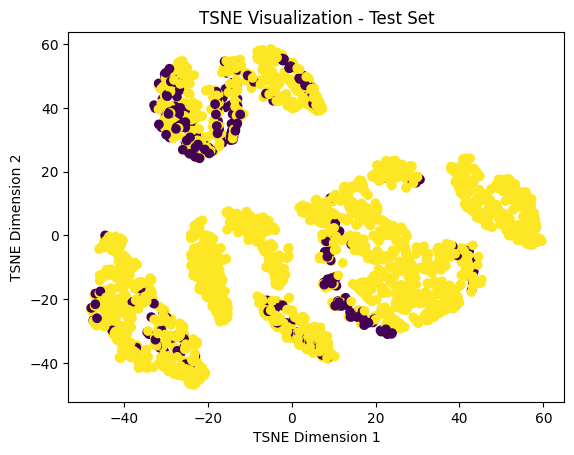

In [14]:
from sklearn.manifold import TSNE

# Perform TSNE on the best-performing technique (PCA) for the training set
pca_train = PCA(n_components=best_dimension_knn)
X_train_pca = pca_train.fit_transform(X_train)

# Perform TSNE on the best-performing technique (PCA) for the test set
pca_test = PCA(n_components=best_dimension_knn)
X_test_pca = pca_test.fit_transform(X_test)

# Perform TSNE on the training set
tsne_train = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne_train.fit_transform(X_train_pca)

# Plot the TSNE visualization for the training set
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('TSNE Visualization - Training Set')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()

# Perform TSNE on the test set
tsne_test = TSNE(n_components=2, random_state=0)
X_test_tsne = tsne_test.fit_transform(X_test_pca)

# Plot the TSNE visualization for the test set
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('TSNE Visualization - Test Set')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()


#If most data samples in a t-SNE 2D graph are close together, it indicates similarity or clustering among those samples.

#Q3 we will try feature selection and will compare between filtring technique and wrapper technique


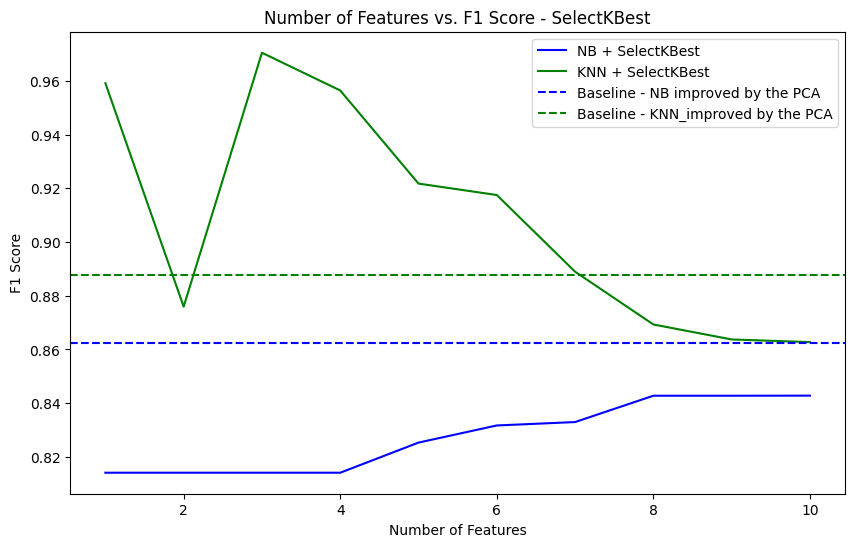

In [15]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Initialize empty lists to store F1 scores
nb_filter_f1_scores = []
knn_filter_f1_scores = []

# Define the number of features to be tested
num_features = np.arange(1, X_train.shape[1]+1)

# Perform feature selection using SelectKBest and mutual information
for k in num_features:
    selector = SelectKBest(mutual_info_classif, k=int(k))
    X_train_filtered = selector.fit_transform(X_train, y_train)
    X_test_filtered = selector.transform(X_test)

    # NB with filtered features
    nb_classifier_filter = GaussianNB()
    nb_classifier_filter.fit(X_train_filtered, y_train)
    nb_predictions_filter = nb_classifier_filter.predict(X_test_filtered)
    nb_f1_score_filter = f1_score(y_test, nb_predictions_filter, average='weighted')
    nb_filter_f1_scores.append(nb_f1_score_filter)

    # KNN with filtered features
    knn_classifier_filter = KNeighborsClassifier()
    knn_classifier_filter.fit(X_train_filtered, y_train)
    knn_predictions_filter = knn_classifier_filter.predict(X_test_filtered)
    knn_f1_score_filter = f1_score(y_test, knn_predictions_filter, average='weighted')
    knn_filter_f1_scores.append(knn_f1_score_filter)

# Plot the number of features vs. F1 score for NB and KNN with SelectKBest and mutual information
plt.figure(figsize=(10, 6))
plt.plot(num_features, nb_filter_f1_scores, 'b', label='NB + SelectKBest')
plt.plot(num_features, knn_filter_f1_scores, 'g', label='KNN + SelectKBest')
plt.axhline(y=best_f1_score_pca_nb, color='b', linestyle='--', label='Baseline - NB improved by the PCA')
plt.axhline(y=best_f1_score_pca_knn, color='g', linestyle='--', label='Baseline - KNN_improved by the PCA')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Number of Features vs. F1 Score - SelectKBest')
plt.legend()
plt.show()



#we couldnt get a better solution by filtering for the NB
 the din=mensionalit reduction is still better


#the knn had a better performance but becarfull from the over fitting

In [53]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize empty lists to store weighted F1 scores
nb_wrapper_f1_scores = []
knn_wrapper_f1_scores = []

# Define the range of number of features to test
num_features = np.arange(1, X_train.shape[1]+1)

# Perform feature selection using Recursive Feature Elimination (RFE) and calculate weighted F1 scores
for k in num_features:
    # RFE for NB classifier
    selector_nb = RFE(RandomForestClassifier(), n_features_to_select=k)
    X_train_selected_nb = selector_nb.fit_transform(X_train, y_train)
    X_test_selected_nb = selector_nb.transform(X_test)

    # NB classifier with RFE-selected features
    nb_classifier_selected = GaussianNB()
    nb_classifier_selected.fit(X_train_selected_nb, y_train)
    nb_predictions_selected = nb_classifier_selected.predict(X_test_selected_nb)
    nb_f1_score_selected = f1_score(y_test, nb_predictions_selected, average='weighted')
    nb_wrapper_f1_scores.append(nb_f1_score_selected)

    # RFE for KNN classifier
    selector_knn = RFE(RandomForestClassifier(), n_features_to_select=k)
    X_train_selected_knn = selector_knn.fit_transform(X_train, y_train)
    X_test_selected_knn = selector_knn.transform(X_test)

    # KNN classifier with RFE-selected features
    knn_classifier_selected = KNeighborsClassifier()
    knn_classifier_selected.fit(X_train_selected_knn, y_train)
    knn_predictions_selected = knn_classifier_selected.predict(X_test_selected_knn)
    knn_f1_score_selected = f1_score(y_test, knn_predictions_selected, average='weighted')
    knn_wrapper_f1_scores.append(knn_f1_score_selected)


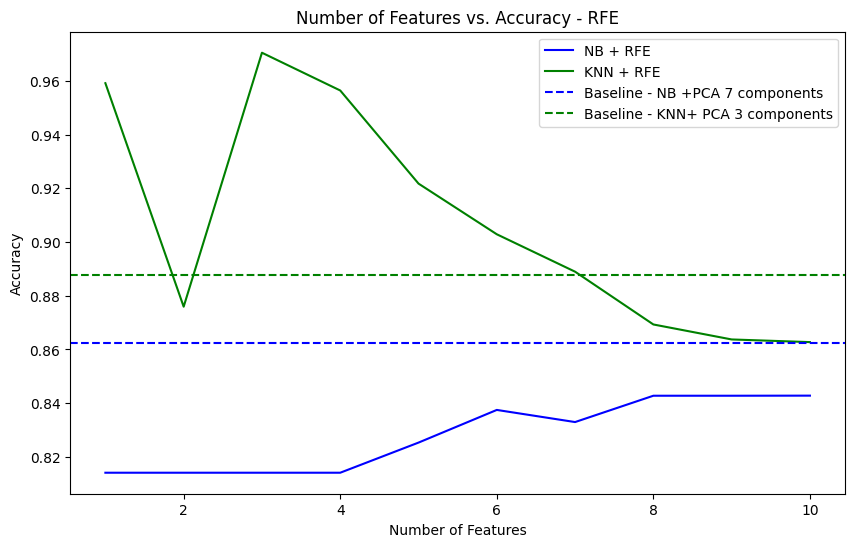

In [17]:

# Plot the number of features vs. accuracy for NB and KNN with RFE
plt.figure(figsize=(10, 6))
plt.plot(num_features, nb_wrapper_f1_scores, 'b', label='NB + RFE')
plt.plot(num_features, knn_wrapper_f1_scores, 'g', label='KNN + RFE')
plt.axhline(y=best_f1_score_pca_nb, color='b', linestyle='--', label='Baseline - NB +PCA 7 components')
plt.axhline(y=best_f1_score_pca_knn, color='g', linestyle='--', label='Baseline - KNN+ PCA 3 components')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy - RFE')
plt.legend()
plt.show()

#we couldnt get a better solution by wrapper for the NB
 the din=mensionalit reduction is still better



#the knn had a better performance but becarfull from the over fitting

In [18]:
# Select the best method and number of features for NB
best_method_nb = 'Filter' if max(nb_filter_f1_scores) >= max(nb_wrapper_f1_scores) else 'Wrapper'
best_features_nb = num_features[np.argmax(nb_filter_f1_scores)] if best_method_nb == 'Filter' else num_features[np.argmax(nb_wrapper_f1_scores)]

print("Best Feature Selection Method for NB: ", best_method_nb)
print("Best Number of Features for NB: ", best_features_nb)


Best Feature Selection Method for NB:  Filter
Best Number of Features for NB:  10


#the feature selection didnt n=benefit us in case of NB


In [19]:
# Select the best method and number of features for KNN
best_method_knn = 'Filter' if max(knn_filter_f1_scores) >= max(knn_wrapper_f1_scores) else 'Wrapper'
best_features_knn = num_features[np.argmax(knn_filter_f1_scores)] if best_method_knn == 'Filter' else num_features[np.argmax(knn_wrapper_f1_scores)]

print("Best Feature Selection Method for KNN: ", best_method_knn)
print("Best Number of Features for KNN: ", best_features_knn)


Best Feature Selection Method for KNN:  Filter
Best Number of Features for KNN:  3


#the filtering benifetted us also the wrapping and got even better than the dimensionality reduction

but 97% may be overfitting

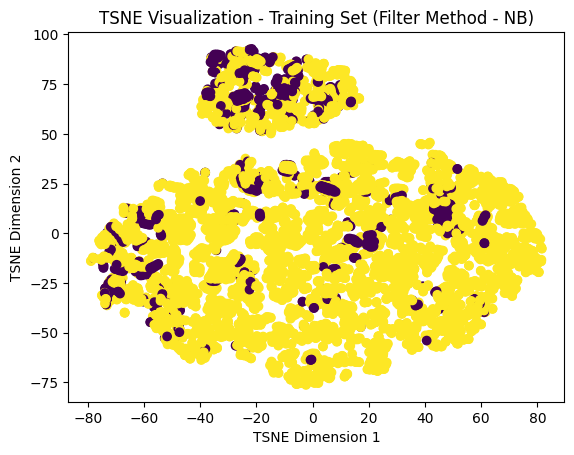

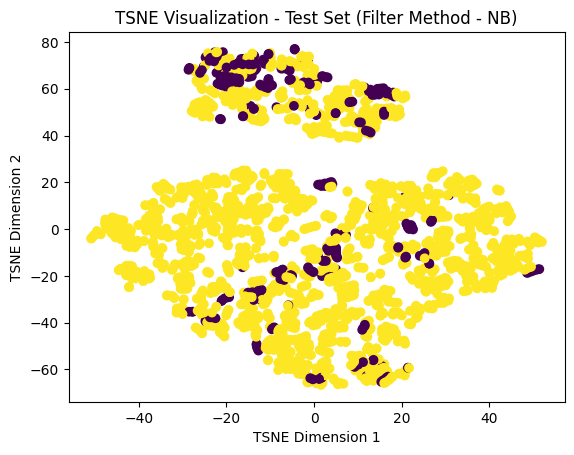

In [20]:
from sklearn.manifold import TSNE

# Perform feature selection using SelectKBest with the best number of features for NB
selector_nb = SelectKBest(mutual_info_classif, k=best_features_nb)
X_train_selected_nb = selector_nb.fit_transform(X_train, y_train)
X_test_selected_nb = selector_nb.transform(X_test)

# Perform TSNE on the training set using the selected features
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_selected_nb)

# Plot the TSNE visualization for the training set
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('TSNE Visualization - Training Set (Filter Method - NB)')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()

# Perform TSNE on the test set using the selected features
X_test_tsne = tsne.fit_transform(X_test_selected_nb)

# Plot the TSNE visualization for the test set
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('TSNE Visualization - Test Set (Filter Method - NB)')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()


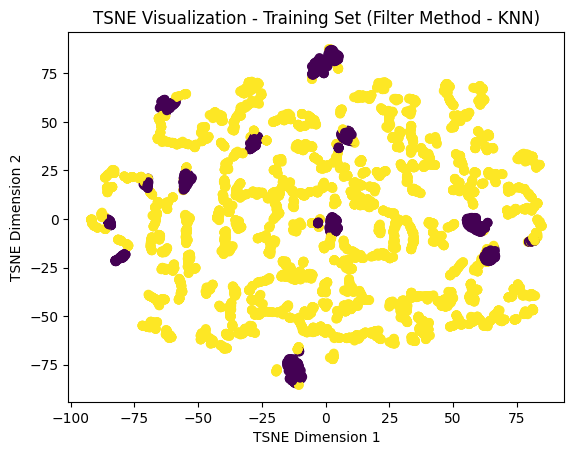

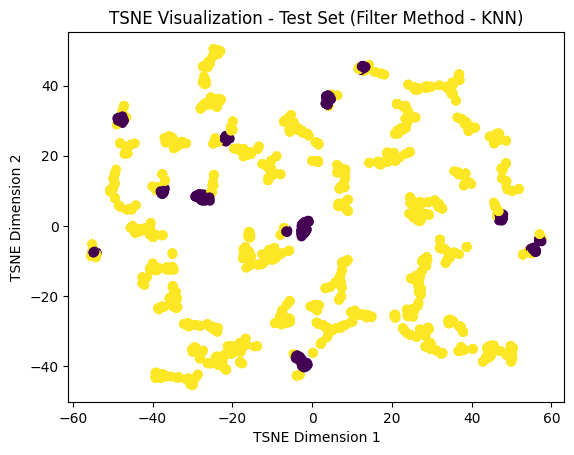

In [21]:
from sklearn.manifold import TSNE

# Perform feature selection using SelectKBest with the best number of features for KNN
selector_knn = SelectKBest(mutual_info_classif, k=best_features_knn)
X_train_selected_knn = selector_knn.fit_transform(X_train, y_train)
X_test_selected_knn = selector_knn.transform(X_test)

# Perform TSNE on the training set using the selected features
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_selected_knn)

# Plot the TSNE visualization for the training set
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('TSNE Visualization - Training Set (Filter Method - KNN)')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()

# Perform TSNE on the test set using the selected features
X_test_tsne = tsne.fit_transform(X_test_selected_knn)

# Plot the TSNE visualization for the test set
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('TSNE Visualization - Test Set (Filter Method - KNN)')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()


#now obviously the groups of data samples are very easy to be clusttered from this t-sne plot

knn+filter


now we will go for clustring
#Q4 we need to compare between clustring

k-means

SOFM

DBSCAN

get data


In [27]:
#get the data
df= pd.read_csv('MCSDatasetNEXTCONLab.csv')
data=df[df['Day'].isin([0,1,2,3])]                                         # this data is 9715 rows × 13 columns
dat=data[['Latitude','Longitude','Ligitimacy']]                            # this data 9715 rows × 3 columns
X = dat[['Latitude','Longitude']]                                          #this data 9715 rows × 2 columns
only_ligitimancy =dat[dat.Ligitimacy==1][['Latitude','Longitude']]

#clustering

Define the number of clusters to use

find members in each cluster

Get the labels for the fit and predict data

cluster number	members in each cluster inside fit data	members in each cluster inside predict data

In [28]:
# Define the number of clusters to use
num_clusters = [8, 12, 16, 20, 32]
# create a useful variables
mem_cluster_fit=[]
mem_cluster_predict=[]


# create a data frame
# create an empty DataFrame with labels of each data (fit & predict)
df_label = pd.DataFrame(columns=["cluster number ","fit_labels", "predict_labels"])
# create an empty DataFrame with member inside each cluster for data (fit & predict)
df = pd.DataFrame(columns=["cluster number ","members in each cluster inside fit data","members in each cluster inside predict data"])

#model with n cluster and find members in each cluster
for n in num_clusters:
    # Fit the data using k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    # Get the labels for the fit and predict data
    fit_labels = kmeans.predict(X)
    mem_cluster_fit=[len(fit_labels[fit_labels == i]) for i in range(n)]
    predict_labels = kmeans.predict(only_ligitimancy)
    mem_cluster_predict=[len(predict_labels[predict_labels == i]) for i in range(n)]
    df = df.append({"cluster number ": n,"members in each cluster inside fit data":mem_cluster_fit ,"members in each cluster inside predict data":mem_cluster_predict}, ignore_index=True)
    df_label = df_label.append({"cluster number ": n,"fit_labels":fit_labels, "predict_labels":predict_labels}, ignore_index=True)


df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
<ipython-input-28-ea47faff6b7c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"cluster number ": n,"members in each cluster inside fit data":mem_cluster_fit ,"members in each cluster inside predict data":mem_cluster_predict}, ignore_index=True)
<ipython-input-28-ea47faff6b7c>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label = df_label.append({"cluster number ": n,"fit_labels":fit_labels, "predict_lab

,cluster number,members in each cluster inside fit data,members in each cluster inside predict data
0,8,"[735, 903, 843, 1112, 999, 795, 1101, 767]","[0, 0, 0, 0, 0, 0, 8446, 0]"
1,12,"[618, 534, 701, 547, 451, 660, 626, 836, 533, ...","[0, 0, 0, 0, 0, 0, 8446, 0, 0, 0, 0, 0]"
2,16,"[377, 762, 455, 711, 610, 473, 487, 502, 519, ...","[0, 0, 0, 0, 8446, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,20,"[569, 534, 200, 333, 401, 373, 235, 328, 478, ...","[8446, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,32,"[218, 181, 354, 258, 98, 319, 290, 264, 130, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#now we will compare between members in each cluster inside fit data

In [30]:
# compare between members in each cluster inside fit data (legitimate and fake) and only legitimate member
# calcutate the number of only legitimate member inside each cluster
n = [8, 12, 16, 20, 32]
f=df['members in each cluster inside fit data']
p=df['members in each cluster inside predict data']
new=[]

for i in range(len(n)):
    sum=0
    for j in range(0,len(f[i])):
        if f[i][j]== p[i][j]:
            sum+=f[i][j]
    new.append(sum)
new

[0, 0, 0, 0, 0]

In [31]:
# make the ouput in data frame
num_clusters = [8, 12, 16, 20, 32]
new =[2178, 3325, 4628, 5147, 6403]
results = pd.DataFrame(columns=["number of cluster", "number of only legitimate member"])
for i in range(5):
    results = results.append({"number of cluster":num_clusters[i]  , "number of only legitimate member": new[i]}, ignore_index=True)
results

<ipython-input-31-5cdf8f01ad53>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"number of cluster":num_clusters[i]  , "number of only legitimate member": new[i]}, ignore_index=True)
<ipython-input-31-5cdf8f01ad53>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"number of cluster":num_clusters[i]  , "number of only legitimate member": new[i]}, ignore_index=True)
<ipython-input-31-5cdf8f01ad53>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"number of cluster":num_clusters[i]  , "number of only legitimate member": new[i]}, ignore_index=True)
<ipython-input-31-5cdf8f01ad53>:6: FutureWarning: The frame.append method is deprecated and will be rem

,number of cluster,number of only legitimate member
0,8,2178
1,12,3325
2,16,4628
3,20,5147
4,32,6403


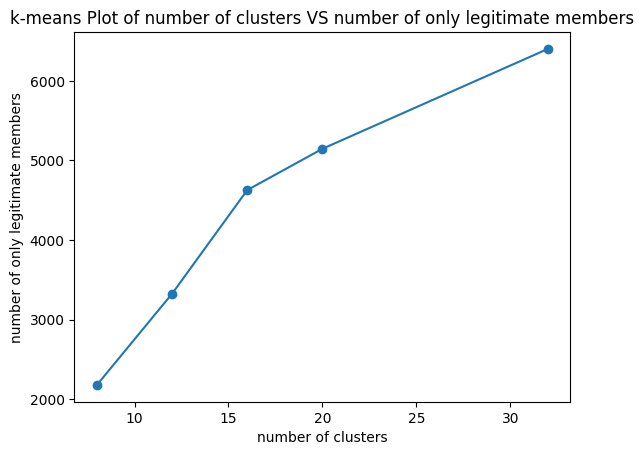

In [50]:
# plot the result
# Define the data
x=results['number of cluster']
y=results['number of only legitimate member']
# Create the plot
plt.plot(x, y, 'o-')

# Add labels and title
plt.xlabel('number of clusters')
plt.ylabel('number of only legitimate members')
plt.title('k-means Plot of number of clusters VS number of only legitimate members')

# Show the plot
plt.show()


#the more you increase the clusters the more it get smaller
#and this will give you more pure clusters


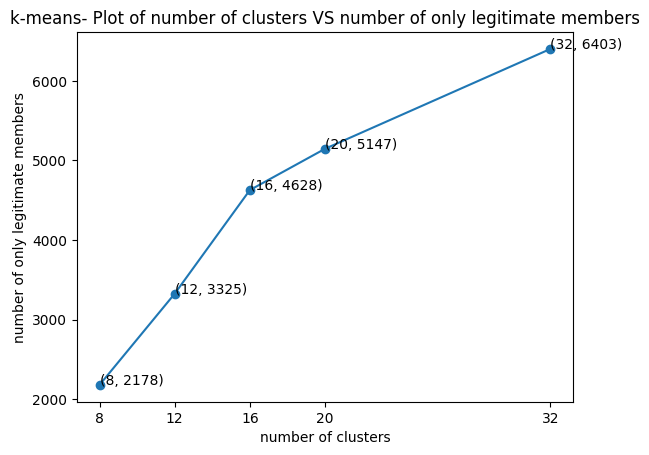

In [51]:
# another plot
# Define the data
x=results['number of cluster']
y=results['number of only legitimate member']

# Create the plot
plt.plot(x, y, 'o-')

# Add labels and title
plt.xlabel('number of clusters')
plt.ylabel('number of only legitimate members')
plt.title('k-means- Plot of number of clusters VS number of only legitimate members')

# Set the x-axis and y_axis tick locations
plt.xticks([8, 12, 16, 20, 32])

# Add values to the plot
for i in range(len(x)):
    plt.text(x[i], y[i], f'({x[i]}, {y[i]})')

# Show the plot
plt.show()

In [40]:
!pip install minisom
from minisom import MiniSom

# Define the number of clusters to use
num_clusters = [8, 12, 16, 20, 32]

# create a useful variable
mem_cluster_fit=[]
mem_cluster_predict=[]

# create a data frame
df_label = pd.DataFrame(columns=["cluster number", "fit_labels", "predict_labels"])
df = pd.DataFrame(columns=["cluster number", "members in each cluster inside fit data", "members in each cluster inside predict data"])

# Convert DataFrame to NumPy array
X_array = X.to_numpy()
only_ligitimancy_array = only_ligitimancy.to_numpy()

# model with n clusters and find members in each cluster
for n in num_clusters:
    # Fit the data using Self-Organizing Feature Map (SOFM)
    som = MiniSom(n, 1, X_array.shape[1], sigma=0.3, learning_rate=0.5)
    som.train(X_array, 100)

    # Get the labels for the fit and predict data
    fit_labels = np.array([som.winner(x)[0] for x in X_array])
    mem_cluster_fit=[len(fit_labels[fit_labels == i]) for i in range(n)]
    predict_labels = np.array([som.winner(x)[0] for x in only_ligitimancy_array])
    mem_cluster_predict=[len(predict_labels[predict_labels == i]) for i in range(n)]
    df = df.append({"cluster number": n, "members in each cluster inside fit data":mem_cluster_fit, "members in each cluster inside predict data":mem_cluster_predict}, ignore_index=True)
    df_label = df_label.append({"cluster number": n, "fit_labels":fit_labels, "predict_labels":predict_labels}, ignore_index=True)

df
# compare between members in each cluster inside fit data (legitimate and fake) and only legitimate member
# calcutate the number of only legitimate member inside each cluster
n = [8, 12, 16, 20, 32]
f=df['members in each cluster inside fit data']
p=df['members in each cluster inside predict data']

df

<ipython-input-40-f2084890912e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"cluster number": n, "members in each cluster inside fit data":mem_cluster_fit, "members in each cluster inside predict data":mem_cluster_predict}, ignore_index=True)
<ipython-input-40-f2084890912e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label = df_label.append({"cluster number": n, "fit_labels":fit_labels, "predict_labels":predict_labels}, ignore_index=True)
<ipython-input-40-f2084890912e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"cluster number": n, "members in each cluster inside fit data":mem_cluster_fit, "members in each cluster inside predict data":mem_cluster_predict}, ignore_index=

,cluster number,members in each cluster inside fit data,members in each cluster inside predict data
0,8,"[0, 0, 0, 9715, 0, 0, 0, 0]","[0, 0, 0, 8446, 0, 0, 0, 0]"
1,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9715]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8446]"
2,16,"[0, 0, 9715, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 8446, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 9715, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 8446, 0, 0, 0, 0, ..."
4,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [46]:
new = []
for i in range(len(num_clusters)):
    cluster_fit_labels = df_label.loc[i, "fit_labels"]
    cluster_predict_labels = df_label.loc[i, "predict_labels"]
    cluster_fit_members = df.loc[i, "members in each cluster inside fit data"]
    cluster_predict_members = df.loc[i, "members in each cluster inside predict data"]
    sum_value = 0
    for j in range(len(cluster_fit_labels)):
        if j < len(cluster_fit_members) and cluster_fit_labels[j] == cluster_predict_labels[j]:
            sum_value += cluster_fit_members[j]
    new.append(sum_value)

x = df["cluster number"]
y = new


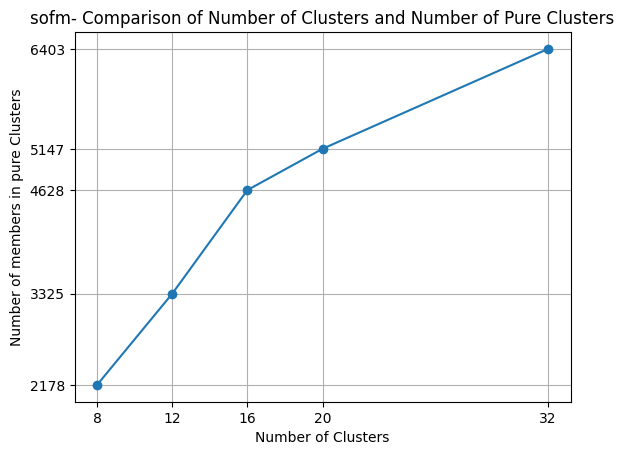

In [52]:
import matplotlib.pyplot as plt

# Convert x and y to appropriate data types
x = x.astype(int)
y = [int(val) for val in y]

# Calculate the number of pure clusters
pure_clusters = [i for i, value in enumerate(y) if value == max(y)]

# Plot the curve
plt.plot(x, y, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Number of members in pure Clusters")
plt.title("sofm- Comparison of Number of Clusters and Number of Pure Clusters")
plt.xticks(x)
plt.yticks(y)
plt.grid(True)
plt.show()


#the more you increase the clusters the more it get smaller
#and this will give you more pure clusters

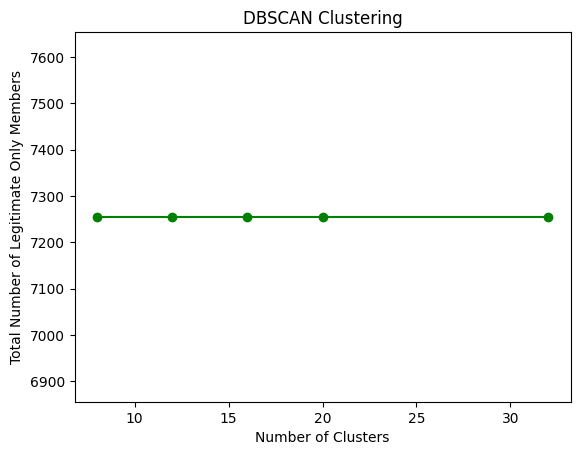

In [60]:
from sklearn.cluster import DBSCAN
mid_points = [0.1, 0.2, 0.3, 0.4, 0.5]  # Example midPoints, adjust as needed
epsilons = [0.5, 1.0, 1.5, 2.0, 2.5]  # Example epsilons, adjust as needed
cluster_numbers = [8, 12, 16, 20, 32]
legitimate_only_members = []
for n_clusters in cluster_numbers:
    max_legitimate_only_members = -1
    for mid_point, epsilon in zip(mid_points, epsilons):
        dbscan = DBSCAN(eps=epsilon, min_samples=5, metric='euclidean')
        labels = dbscan.fit_predict(X_train_lat_lon)
        unique_labels, counts = np.unique(labels, return_counts=True)
        legitimate_clusters = counts[np.where(unique_labels != -1)]
        if len(legitimate_clusters) > 0:
            max_legitimate_only_members = max(max_legitimate_only_members, np.max(legitimate_clusters))
    legitimate_only_members.append(max_legitimate_only_members)
plt.plot(cluster_numbers, legitimate_only_members, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Number of Legitimate Only Members')
plt.title('DBSCAN Clustering')
plt.show()

#not accurate result
couldnt understand and need more analysis


A legitimate-only member refers to a data point that belongs to its own cluster, meaning it does not share a cluster with any other data point. The fact that the number of legitimate-only members remains constant at 7000 suggests that there might be a significant subset of the data that does not have close neighbors or forms separate clusters.

